Classical Tic Tac Toe

In [1]:
import numpy as np
import time
from IPython.display import clear_output

In [2]:
def choosePlayer():
    choice1 = input("Player 1: Would you like to be X or O? ").strip().upper()

    while choice1 not in ('X', 'O'):  # invalid input
        choice1 = input("Invalid choice. Please enter X or O: ").strip().upper()

    choice2 = 'O' if choice1 == 'X' else 'X'  # assign opposite symbol

    return {1: choice1, 2: choice2}  # return hash table

In [3]:
def makeMove(board, player, symbols, cell):
    if(player == 1):
        board[cell]= symbols[1]
    elif(player == 2):
        board[cell]= symbols[2]
    else:
        print("makeMove error") # can make more formal later


In [4]:
def printBoard(board):

    print(f"{board[0]} | {board[1]} | {board[2]}")
    print("---------")
    print(f"{board[3]} | {board[4]} | {board[5]}")
    print("---------")
    print(f"{board[6]} | {board[7]} | {board[8]}")

In [5]:
def checkWin(board, symbols): # returns 0 for no winner or draw yet, 1 for player 1 win, 2 for player 2 win, 3 for draw
    player1Wins = False
    player2Wins = False
    
    # check rows
    for row in range(3):
        if board[row*3] == board[row*3 + 1] == board[row*3 + 2] != ' ':
            if board[row*3] == symbols[1]:
                player1Wins = True
            else:
                player2Wins = True
    
    # check columns
    for col in range(3):
        if board[col] == board[col + 3] == board[col + 6] != ' ':
            if board[col] == symbols[1]:
                player1Wins = True
            else:
                player2Wins = True
    
    # check diagonals
    if board[0] == board[4] == board[8] != ' ':
        if board[0] == symbols[1]:
            player1Wins = True
        else:
            player2Wins = True
    if board[2] == board[4] == board[6] != ' ':
        if board[2] == symbols[1]:
            player1Wins = True
        else:
            player2Wins = True
    
    
    if (player1Wins and player2Wins):
        return 3
    elif player1Wins:
        return 1
    elif player2Wins:
        return 2
    else:
        return 3

Quantum Tic Tac Toe

In [6]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

In [7]:
def makeQuantumCircuit():
    qc = QuantumCircuit(9,9) # want 9 qubits for each tic-tac-toe cell
    return qc

In [8]:
def makeChoiceSingle(qc,initialized,gate):

    # move choice
    while True:
        choice = input(f"Choose an initialized cell to apply the {gate} gate (0-8): ")

        # check if the input is a valid digit and falls within the valid range, and if the spot is available
        try:
            choice = int(choice)  # check if integer

            if choice not in range(9):  # check if within range
                print("Please enter a number between 0 and 8.")
            elif initialized[choice] != True:  # check if cell is initialized
                print("That cell is not initialized. Choose another.")
            else:
                break  # exit the loop if input is valid
        except ValueError:
            # if input is not an integer, catch the ValueError and prompt again
            print("Invalid input. Please enter a valid number between 0 and 8.")

    # update circuit
    if(gate=='X'):
        qc.x(choice)
    elif(gate=='Z'):
        qc.z(choice)
    elif(gate=='H'):
        qc.h(choice)

    return qc

In [9]:
def applyXGate(qc,initialized):
    gate = 'X'
    qc = makeChoiceSingle(qc,initialized,gate)
    return qc


In [10]:
def applyZGate(qc,initialized):
    gate = 'Z'
    qc = makeChoiceSingle(qc,initialized,gate)
    return qc

In [11]:
def applyHGate(qc,initialized):
    gate = 'H'
    qc = makeChoiceSingle(qc,initialized,gate)
    return qc

In [12]:
def makeChoiceMulti(qc,initialized,gate):
    # move choice
    choice1 = 0
    choice2 = 0
    while True:
        if(gate=="CNOT"):
            choice1 = input(f"Choose a control qubit for the {gate} gate (0-8): ")
        elif(gate=="SWAP"):
            choice1 = input(f"Choose the first qubit for the {gate} gate (0-8): ")

        # check if the input is a valid digit and falls within the valid range, and if the spot is available
        try:
            choice1 = int(choice1)  # check if integer

            if choice1 not in range(9):  # check if within range
                print("Please enter a number between 0 and 8.")
            elif initialized[choice1] != True:  # check if cell is initialized
                print("That cell is not initialized. Choose another.")
            else:
                break  # exit the loop if input is valid
        except ValueError:
            # if input is not an integer, catch the ValueError and prompt again
            print("Invalid input. Please enter a valid number between 0 and 8.")

    while True:
        if(gate=="CNOT"):
            choice2 = input(f"Choose a target qubit for the {gate} gate (0-8): ")
        elif(gate=="SWAP"):
            choice2 = input(f"Choose the second qubit for the {gate} gate (0-8): ")

        # check if the input is a valid digit and falls within the valid range, and if the spot is available
        try:
            choice2 = int(choice2)  # check if integer

            if choice2 not in range(9):  # check if within range
                print("Please enter a number between 0 and 8.")
            elif initialized[choice2] != True:  # check if cell is initialized
                print("That cell is not initialized. Choose another.")
            elif choice2==choice1:
                print("That same cell can't be chosen. Choose another.")
            else:
                break  # exit the loop if input is valid
        except ValueError:
            # if input is not an integer, catch the ValueError and prompt again
            print("Invalid input. Please enter a valid number between 0 and 8.")

    # update circuit
    if(gate=='CNOT'):
        qc.cx(choice1,choice2)
    elif(gate=='SWAP'):
        qc.swap(choice1,choice2)

    return qc

In [13]:
def applyCNOTGate(qc,initialized):
    gate = 'CNOT'
    qc = makeChoiceMulti(qc,initialized,gate)
    return qc

In [14]:
def applySWAPGate(qc,initialized):
    gate = 'SWAP'
    qc = makeChoiceMulti(qc,initialized,gate)
    return qc

In [15]:
def updateQuantumBoard(qBoard, playerTurn, playerSymbols, moveChoice, initialized):

    # initialize the chosen qubit depending on the player turn
    if (playerSymbols[playerTurn] == 'X'):
        qBoard.x(moveChoice)  # place an X: initialize to 1 by flipping the state
        #else: keep state as a 0

    # allow player to add one gate (can be single or multi qubit)
    addGate = input(f"Player {playerTurn}: Would you like to add a quantum gate? (y/n): ").strip().upper()
    while addGate != "Y" and addGate != "N":  # invalid input
            addGate = input(f"Invalid choice. Player {playerTurn}: Would you like to add a quantum gate? (y/n)").strip().upper()
    
    # apply a quantum gate based on player's input
    if (addGate == "Y"):

        # at least two qubits must be initialized to apply a multi qubit gate
        if initialized.count(True) >= 2:
            gateChoice = input(f"Player {playerTurn}: Choose a single qubit gate (X, Z, H) or multi qubit gate (CNOT, SWAP): ").strip().upper()
            while gateChoice != "X" and gateChoice != "Z" and gateChoice != "H" and gateChoice != "CNOT" and gateChoice != "SWAP":  # invalid input
                gateChoice = input(f"Invalid choice. Player {playerTurn}: Choose a single qubit gate (X, Z, H) or multi qubit gate (CNOT, SWAP): ").strip().upper()
        else:
            gateChoice = input(f"Player {playerTurn}: Choose a single qubit gate (X, Z, H): ").strip().upper()
            while gateChoice != "X" and gateChoice != "Z" and gateChoice != "H":  # invalid input
                gateChoice = input(f"Invalid choice. Player {playerTurn}: Choose a single qubit gate (X, Z, H): ").strip().upper()

        if gateChoice == "X":
            applyXGate(qBoard, initialized)
            
        elif gateChoice == "Z":
            applyZGate(qBoard, initialized)

        elif gateChoice == "H":
            applyHGate(qBoard, initialized)

        elif gateChoice == "CNOT":
            applyCNOTGate(qBoard, initialized)

        elif gateChoice == "SWAP":
            applySWAPGate(qBoard, initialized)

    return qBoard, initialized

In [ ]:
def measureBoard(qc,runChoice):

    # run on quantum computer
    if runChoice == 1:
        # measure board and return array of classical values
        qc.measure(list(range(9)), list(range(9)))

        # use real quantum computer (includes personal token for my IBM account)
        service = QiskitRuntimeService(channel="ibm_quantum", token = MYTOKEN)
        
        # use least busy quantum computer
        backend = service.least_busy(simulator=False, operational=True, min_num_qubits=9)
        print(f"Using backend: {backend.name}")

        #SAMPLER
        # run the circuit using SamplerV2
        sampler = SamplerV2(backend)
        transpiled_qc = transpile(qc, backend)
        print("\nTranspiled Quantum Circuit:")
        display(transpiled_qc.draw('mpl'))
        job = sampler.run([transpiled_qc], shots=100)
    
        #job_result = job.result()
        pub_result = job.result()[0]
        #job_id = job.job_id()      
        counts=pub_result.data['c'].get_counts()
        print("Counts:",counts)

        # Get the most likely bitstring 
        bitstring = max(counts, key=counts.get)

        # Reverse bitstring to match qubit order (optional, depending on how you interpret results)
        bitstring = bitstring[::-1]

        # Convert to list of integers
        classical_board = [int(bit) for bit in bitstring]
        classical_board = ['X' if bit == '1' else 'O' for bit in bitstring]

    # run on simulator
    elif runChoice == 2:
        qc.measure(list(range(9)), list(range(9)))

        # use local simulator backend
        backend = AerSimulator()
        sampler = SamplerV2(backend)
        transpiled_qc = transpile(qc, backend)
        print("\nTranspiled Quantum Circuit:")
        display(transpiled_qc.draw('mpl'))
        job = sampler.run([transpiled_qc], shots=100)

        pub_result = job.result()[0]
        counts = pub_result.data['c'].get_counts()
        print("Counts:", counts)

        bitstring = max(counts, key=counts.get)
        bitstring = bitstring[::-1]
        classical_board = ['X' if bit == '1' else 'O' for bit in bitstring]

    else:
        return

    return classical_board  # list of Xs and Os

In [ ]:
def getResults(jobID):
    # use real quantum computer (includes personal token for my IBM account)
    service = QiskitRuntimeService(channel="ibm_quantum", token = MYTOKEN)
    
    job = service.job(jobID)
    job_result = job.result()
    pub_result = job.result()[0]
    job_id = job.job_id()   
    counts=pub_result.data['c'].get_counts()       
 
    # Get the most likely bitstring (only one if shots=1)
    bitstring = max(counts, key=counts.get)

    # Reverse bitstring to match qubit order (optional, depending on how you interpret results)
    bitstring = bitstring[::-1]

    # Convert to list of integers
    classical_board = [int(bit) for bit in bitstring]
    classical_board = ['X' if bit == '1' else 'O' for bit in bitstring]

    print("Job ID:",job_id)
    print("Job Result:",job_result)
    print("Pub Result:",pub_result)
    print("Counts:",counts)
    print("Classical Board:",classical_board)

In [18]:
# Play Quantum Tic Tac Toe

def quantumTicTacToe():
    qBoard = makeQuantumCircuit() # 9 empty qubits (all initalized to zero)
    initialized = [False] * 9  # track if each cell has been initialized (since they all start at zero)
    unmeasuredBoard = [' '] * 9 # empty starting classical board

    playerTurn = 1 # initial state: 1 for player 1, 2 for player 2

    playerSymbols = choosePlayer() # assign X and O to players

    while not all(initialized): # run until all "classical" cells have been initialized

        # initialize a qubit
        clear_output(wait=True)
        print("Current quantum circuit:")
        display(qBoard.draw('mpl')) # show current quantum circuit setup
        print("Unmeasured classical board:\n")
        printBoard(unmeasuredBoard)
        time.sleep(1)

        # move choice
        while True:
            moveChoice = input(f"Player {playerTurn}: What cell would you like to place {playerSymbols[playerTurn]} (cells indexed 0-8) (q - quit)")

            # check if the input is a valid digit and falls within the valid range, and if the spot is available
            try:
                moveChoice = int(moveChoice)  # check if integer

                if moveChoice not in range(9):  # check if within range
                    print("Please enter a number between 0 and 8.")
                elif initialized[moveChoice] != False:  # check if cell is initialized
                    print("That cell is already initialized. Choose another.")
                else:
                    break  # Exit the loop if input is valid
            except ValueError:
                if moveChoice.lower() == 'q':
                    print("\nUser chose to quit.")
                    return
                else:
                    # if input is not an integer, catch the ValueError and prompt again
                    print("Invalid input. Please enter a valid number between 0 and 8.")

        unmeasuredBoard[moveChoice] = playerSymbols[playerTurn]
        initialized[moveChoice] = True # update initialized qubits
        
        clear_output(wait=True)
        print("Current quantum circuit:")
        display(qBoard.draw('mpl')) # show current quantum circuit setup
        print("Unmeasured classical board:\n")
        printBoard(unmeasuredBoard)

        updateQuantumBoard(qBoard, playerTurn, playerSymbols, moveChoice, initialized)

        # update player turn
        playerTurn = 2 if playerTurn == 1 else 1

    # all qubits have been initialized (board is full): collapse board for measurement
    clear_output(wait=True)
    print("Quantum Board:")
    display(qBoard.draw('mpl'))
    print("Unmeasured classical board:\n")
    printBoard(unmeasuredBoard)

    # computer run choice
    while True:
        runChoice = input("Do you want to run this circuit on an IBM quantum computer (1) or a simulator (2)")
        # check if the input is a valid digit and falls within the valid range, and if the spot is available
        try:
            runChoice = int(runChoice)  # check if integer
            if runChoice != 1 and runChoice != 2:  # check if within range
                print("Please enter a 1 or 2.")
            else:
                break  # exit the loop if input is valid
        except ValueError:
            # if input is not an integer, catch the ValueError and prompt again
            print("Invalid input. Please enter a 1 or 2.")
    
    classicalBoard = measureBoard(qBoard,runChoice) # returns array of Xs and Os of classical board

    winner = checkWin(classicalBoard,playerSymbols)
    #clear_output(wait=True)

    # print final boards
    print("\nClassical Board:\n")
    printBoard(classicalBoard)

    if(winner==1):
        print("\nPlayer 1 wins!")
    elif(winner==2):
        print("\nPlayer 2 wins!")
    else:
        print("\nIt is a draw.")
    
    return  # finished game


Quantum Board:


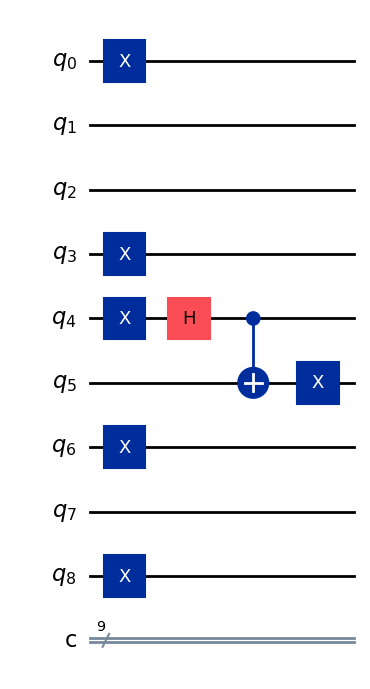

Unmeasured classical board:

X | O | O
---------
X | X | O
---------
X | O | X

Transpiled Quantum Circuit:


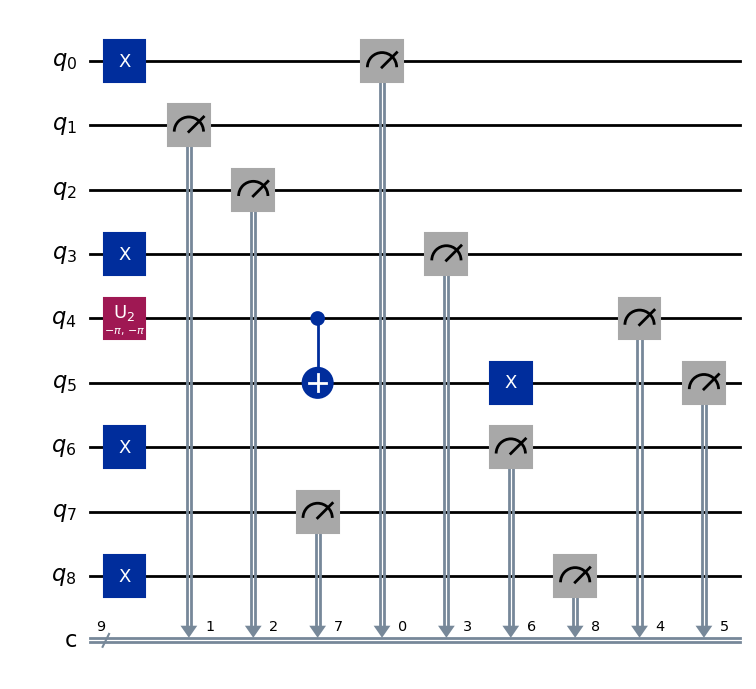

Counts: {'101101001': 49, '101011001': 51}

Classical Board:

X | O | O
---------
X | X | O
---------
X | O | X

Player 1 wins!


In [19]:
# play quantum tic tac toe!!!
quantumTicTacToe()